In [4]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf


In [10]:
uni_df = pd.read_excel(".\data\Fallstudiendaten_Uni.xlsx")
uni_df

,Participant,Studiengang,Standort,Besuch Wirtschaftsmathematik,Geschlecht,Geburtsjahr,Beziehungsstatus,Durchschnittsnote im Abitur,Mathematiknote im Abitur,LK_Deutsch,...,Zeit-Sonstiges,Wechsel Praxispartner,Lebenszufriedenheit,Zufriedenheit mit Praxispartner,Zufriedenheit mit finanzieller Situation,Zufriedenheit mit Gesundheit,Zufriedenheit mit Kommilitonenaustausch,Studienzufriedenheit,Mathenote im 2. Semester,Zufriedenheit mit Note
0,53,4,21,5.0,1,24.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,4,21,6.0,2,19.0,3.0,3.0,3.0,0.0,...,1.0,2.0,5.0,3.0,2.0,5.0,7.0,7.0,1.3,2.0
2,56,4,21,6.0,2,22.0,1.0,3.3,2.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,16,21,8.0,2,21.0,2.0,2.3,3.0,1.0,...,NaN,2.0,6.0,3.0,2.0,6.0,5.0,6.0,NaN,NaN
4,58,16,21,5.0,1,19.0,1.0,NaN,NaN,NaN,...,NaN,3.0,10.0,10.0,6.0,10.0,5.0,10.0,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,2,23.0,NaN,2.0,2.0,0.0,...,36.0,3.0,4.0,6.0,10.0,3.0,1.0,6.0,2.0,3.0
882,1023,24,18,NaN,2,23.0,2.0,3.3,4.0,0.0,...,NaN,3.0,9.0,8.0,5.0,10.0,6.0,7.0,4.0,2.0
883,1024,4,18,NaN,1,20.0,NaN,NaN,3.0,0.0,...,31.0,3.0,7.0,7.0,3.0,6.0,8.0,6.0,3.7,3.0
884,1025,5,18,6.0,1,22.0,1.0,2.0,2.0,0.0,...,NaN,3.0,8.0,8.0,7.0,9.0,9.0,9.0,3.0,2.0


In [ ]:
signifcat_variable_df=pd.DataFrame()




In [8]:
import pandas as pd
from scipy import stats


columns_list = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Lebenszufriedenheit', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']


column_string = ' + '.join(columns_list)

print(column_string)


Participant + Studiengang + Standort + Besuch Wirtschaftsmathematik + Geschlecht + Geburtsjahr + Beziehungsstatus + Durchschnittsnote im Abitur + Mathematiknote im Abitur + LK_Deutsch + LK_Mathe + LK_Englisch + Religion + Lernaufwand + Schwierigkeitsgrad + Umfang + Erwartungen + Zeit-Studium + Zeit-Praxispartner + Zeit-Nebenjob + Zeit-Hobbys + Zeit-Freizeit + Zeit-Hausarbeit + Zeit-Essen + Zeit-Schlafen + Zeit-Sonstiges + Wechsel Praxispartner + Lebenszufriedenheit + Zufriedenheit mit Praxispartner + Zufriedenheit mit finanzieller Situation + Zufriedenheit mit Gesundheit + Zufriedenheit mit Kommilitonenaustausch + Studienzufriedenheit + Mathenote im 2. Semester + Zufriedenheit mit Note


#Punkt 1 Führe für ALLE VARIABLEN im Datensatz einen einzelnen statistischen Test mit der
ausgewählten abhängigen Variable durch und erstelle einen Datensatz, in welchem
nur noch die Variablen enthalten sind, welche in den einzelnen Tests ein signifikantes
Ergebnis gezeigt haben. (Hierdurch dürfte der Ausgangsdatensatz einige Variablen
verlieren und kleiner werden) Als Tipp zur Dokumentation: Eine Tabelle mit den
Spalten „Variable“, „durchgeführter Test“, „Ergebnis des Tests“ ist ein guter Sta

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats


dependent_variable = 'Lebenszufriedenheit'
significant_variables = []


for column in uni_df.columns:
    if column != dependent_variable:

        if pd.api.types.is_numeric_dtype(uni_df[column]):

            x = uni_df[column].replace([np.inf, -np.inf], np.nan).dropna()
            y = uni_df[dependent_variable].replace([np.inf, -np.inf], np.nan).dropna()


            min_length = min(len(x), len(y))
            x, y = x.iloc[:min_length], y.iloc[:min_length]

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson correlation'

        elif pd.api.types.is_categorical_dtype(uni_df[column]):

            x = uni_df[column].dropna()
            y = uni_df[dependent_variable].dropna()


            min_length = min(len(x), len(y))
            x, y = x.iloc[:min_length], y.iloc[:min_length]

            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-squared test'
        else:

            pass


        if p_value < 0.05:
            significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})


significant_variables_df = pd.DataFrame(significant_variables)


print(significant_variables_df)


                       Variable  durchgeführter Test  Ergebnis des Tests
0  Zufriedenheit mit Gesundheit  Pearson correlation            0.023283
1          Studienzufriedenheit  Pearson correlation            0.000809



##2. Erstelle für diesen neuen Datensatz eine vollständige deskriptive Statistik und zeige
dabei: Welche Variablen sind noch enthalten, wie sind diese ausgeprägt (Häufigkeiten
/ Lage- und Streuungsmaße / Boxplots & Histogramme)

       Participant  Studiengang    Standort  Besuch Wirtschaftsmathematik  \
count   886.000000   886.000000  886.000000                    810.000000   
mean    539.612867    17.205418   18.472912                      6.528395   
std     281.242566     6.344766   10.184338                      1.561214   
min      53.000000     1.000000    1.000000                      1.000000   
25%     293.250000    12.000000    9.500000                      6.000000   
50%     540.500000    17.000000   19.000000                      6.000000   
75%     781.750000    23.000000   27.000000                      8.000000   
max    1026.000000    24.000000   37.000000                      8.000000   

       Geschlecht  Geburtsjahr  Beziehungsstatus  Durchschnittsnote im Abitur  \
count   886.00000   861.000000        794.000000                   767.000000   
mean      1.71219    20.753775          1.964736                     2.592699   
std       0.46042     3.258228          1.019985               

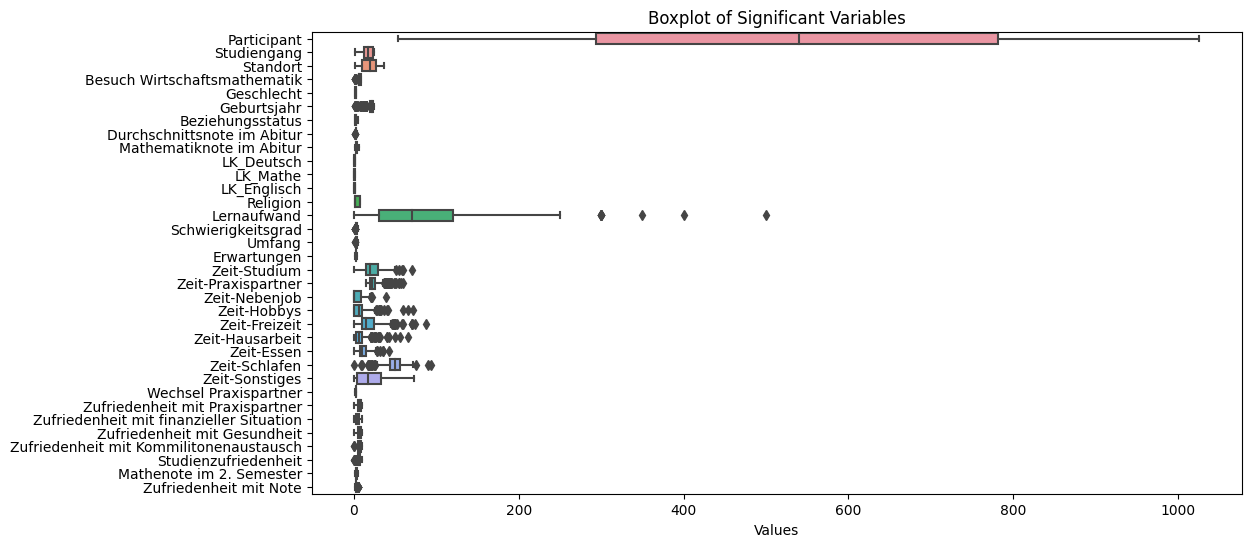

<Figure size 1200x800 with 0 Axes>

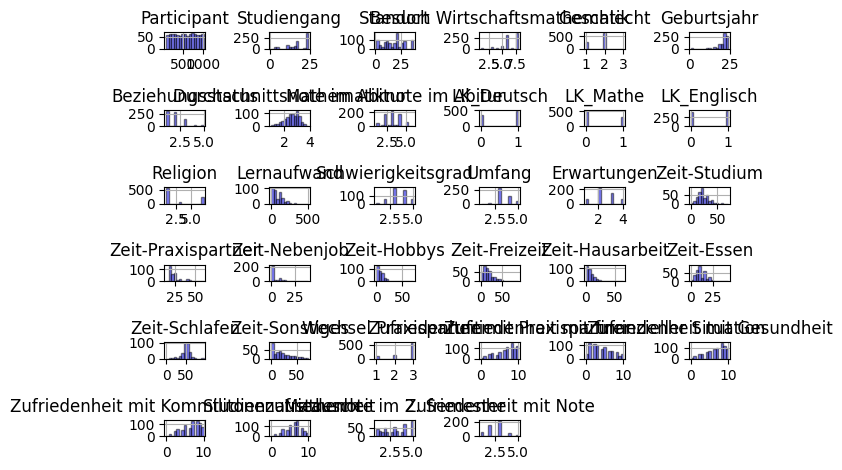

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# DataFrame "uni_df" und die abhängige Variable "Lebenszufriedenheit"  sind oben definiert

dependent_variable = 'Lebenszufriedenheit'  # Hier den Namen der tatsächlichen abhängigen Variable eintragen
significant_variables = []

# Iteriere über jede Spalte in "uni_df", außer der abhängigen Variable
for column in uni_df.columns:
    if column != dependent_variable:
        # Überprüfe auf NaN- und unendliche Werte in beiden Spalten, bevor der Test durchgeführt wird
        if pd.api.types.is_numeric_dtype(uni_df[column]):
            # Überprüfe und entferne NaN- und unendliche Werte aus den Spalten
            x = uni_df[column].replace([np.inf, -np.inf], np.nan).dropna()
            y = uni_df[dependent_variable].replace([np.inf, -np.inf], np.nan).dropna()

            #  x und y die gleiche Länge haben
            min_length = min(len(x), len(y))
            x, y = x.iloc[:min_length], y.iloc[:min_length]

            corr, p_value = stats.pearsonr(x, y)
            test_name = 'Pearson-Korrelation'
        # Für kategoriale Variablen, verwende den Chi-Quadrat-Test
        elif pd.api.types.is_categorical_dtype(uni_df[column]):
            # Überprüfe und entferne NaN aus den Spalten
            x = uni_df[column].dropna()
            y = uni_df[dependent_variable].dropna()

            # Stelle sicher, dass x und y die gleiche Länge haben
            min_length = min(len(x), len(y))
            x, y = x.iloc[:min_length], y.iloc[:min_length]

            contingency_table = pd.crosstab(x, y)
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
            test_name = 'Chi-Quadrat-Test'
        else:
            # Andere Datentypen (falls vorhanden) entsprechend behandeln
            pass

        # Überprüfe, ob das Testergebnis signifikant ist (z. B. p-Wert < 0,05)
        if p_value < 0.05:
            significant_variables.append({'Variable': column, 'durchgeführter Test': test_name, 'Ergebnis des Tests': p_value})

# Erstelle ein DataFrame mit den signifikanten Variablen und ihren Testergebnissen
significant_variables_df = pd.DataFrame(significant_variables)

# Gib das DataFrame aus
print(significant_variables_df)
